In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(17):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['IND']

In [13]:
team.games

{'week1': <src.game.Game at 0x1a2744ce80>,
 'week2': <src.game.Game at 0x1a31d06b00>,
 'week3': <src.game.Game at 0x10d7c9860>,
 'week4': <src.game.Game at 0x10d7e0668>,
 'week5': <src.game.Game at 0x10d7f65c0>,
 'week6': <src.game.Game at 0x10e506320>,
 'week7': <src.game.Game at 0x10e512ba8>,
 'week8': <src.game.Game at 0x1a22c1a320>,
 'week10': <src.game.Game at 0x1a22c3d128>,
 'week11': <src.game.Game at 0x1a22c50668>,
 'week12': <src.game.Game at 0x1a22c62ba8>,
 'week13': <src.game.Game at 0x1a22c7fda0>,
 'week14': <src.game.Game at 0x1a22c97080>,
 'week15': <src.game.Game at 0x1a22ca9e48>,
 'week16': <src.game.Game at 0x1a22cbc3c8>,
 'week17': <src.game.Game at 0x1a23aa1320>}

In [14]:
team.process_weeks(weeks)

/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/

In [15]:
game = team.games['week1']
game.list_plays()

Play 1: (14:11) (Shotgun) A.Dalton pass short left intended for J.Mixon INTERCEPTED by K.Moore II at CIN 39. K.Moore II to CIN 7 for 32 yards (A.Dalton).
Play 2: (12:32) A.Dalton pass short right to T.Eifert pushed ob at CIN 40 for 29 yards (M.Hooker).
Play 3: (11:17) (Shotgun) A.Dalton pass short left to J.Mixon to IND 32 for 21 yards (C.Geathers).
Play 4: (9:58) A.Dalton pass short right to A.Green to IND 22 for 5 yards (N.Hairston).
Play 5: (8:35) (Shotgun) A.Dalton pass incomplete deep right to J.Ross.
Play 6: (8:30) (Shotgun) A.Dalton pass incomplete short middle to T.Boyd (J.Sheard).
Play 7: (1:23) A.Dalton pass short right to J.Mixon to CIN 33 for 8 yards (N.Hairston).
Play 8: (:58) (No Huddle, Shotgun) A.Dalton pass short right to T.Kroft to CIN 42 for 9 yards (A.Walker, D.Leonard).
Play 9: (:11) (Shotgun) A.Dalton pass short left to A.Green to IND 45 for 13 yards (M.Farley). FUMBLES (M.Farley), touched at IND 45, RECOVERED by IND-D.Leonard at IND 42. D.Leonard to IND 42 for no

In [16]:
for game in team.games.values():
    game.process_plays(players)

    Quincy Wilson (CB-31) covering John Ross (WR-15)
    Kenny Moore II (CB-23) covering Tyler Boyd (WR-83)
    Nate Hairston (CB-27) covering A.J. Green (WR-18)
    Kenny Moore II (CB-23) - Zone on end movement criteria
    Kenny Moore II (CB-23) covering A.J. Green (WR-18)
    Kenny Moore II (CB-23) - Zone on end movement criteria
    Kenny Moore II (CB-23) Bltizing
    Skai Moore (ILB-55) Bltizing
    Quincy Wilson (CB-31) covering A.J. Green (WR-18)
    Nate Hairston (CB-27) covering John Ross (WR-15)
    Kenny Moore II (CB-23) covering Tyler Boyd (WR-83)
    Skai Moore (ILB-55) covering C.J. Uzomah (TE-87)
    Nate Hairston (CB-27) - Zone on end movement criteria
    Kenny Moore II (CB-23) - Zone on end movement criteria
    Skai Moore (ILB-55) - Zone on end movement criteria
    Kenny Moore II (CB-23) covering Tyler Boyd (WR-83)
    Clayton Geathers (FS-26) covering C.J. Uzomah (TE-87)
    Kenny Moore II (CB-23) - Zone on end movement criteria
    Clayton Geathers (FS-26) - Zone 

In [17]:
play_number = 22

In [18]:
play = game.plays[play_number - 1]

In [19]:
play.play_data

gameId                                                           2018090902
playId                                                                 2824
playDescription           (4:18) A.Dalton pass deep left to A.Green for ...
quarter                                                                   3
down                                                                      1
yardsToGo                                                                10
possessionTeam                                                          CIN
playType                                                     play_type_pass
yardlineSide                                                            IND
yardlineNumber                                                           38
offenseFormation                                                 SINGLEBACK
personnelO                                                 1 RB, 2 TE, 2 WR
defendersInTheBox                                                         6
numberOfPass

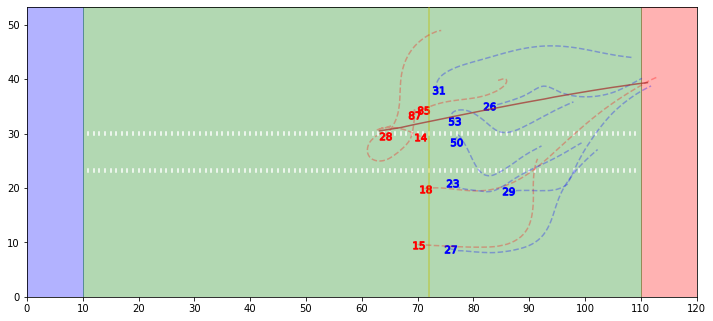

In [20]:
play.plot_play(markers='number')

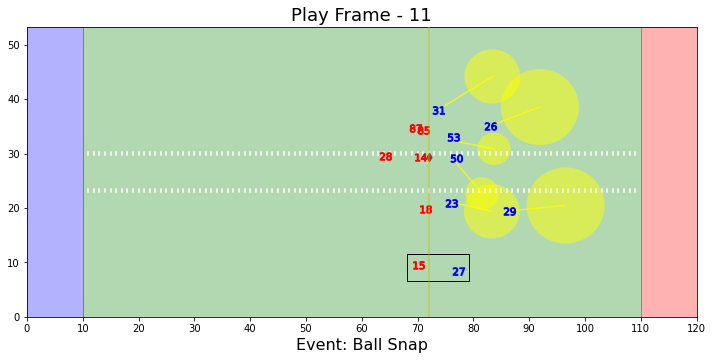

In [21]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='number')

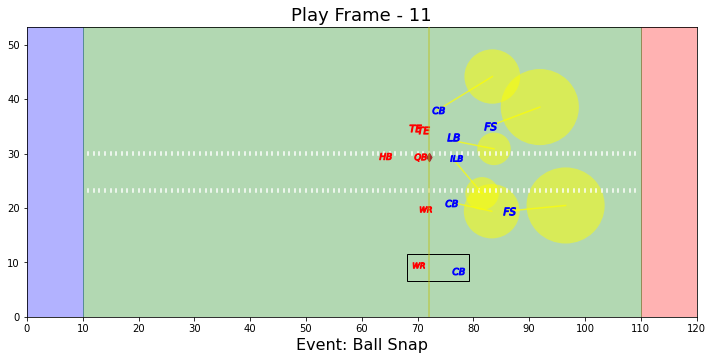

In [22]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='position')

## Defensive Personal Package

In [23]:
play.play_data['personnelD']

'4 DL, 2 LB, 5 DB'

In [24]:
play.play_data['personnelD'].split(', ')[-1]

'5 DB'

In [25]:
int(play.play_data['personnelD'].split(', ')[-1].split()[0])

5

In [26]:
play.defensive_personal_package

'nickel'

## Safety Help

### Top Side

In [27]:
top_safety = play.return_player_by_number(26)

In [28]:
top_safety.zone_loc

array([91.91, 38.58])

In [29]:
top_cb = play.return_player_by_number(31)

In [30]:
top_cb.location(play.events['pass_forward'])

array([84.17, 44.43])

In [31]:
top_cb.safety_help

True

### Bottom Side

In [32]:
bottom_safety = play.return_player_by_number(29)

In [33]:
bottom_safety.zone_loc

array([96.53, 20.48])

In [34]:
bottom_safety.distance_from_center(play.events['pass_forward'])

-8.79

In [35]:
bottom_cb = play.return_player_by_number(27)

In [36]:
bottom_cb.location(play.events['pass_forward'])

array([91.61, 10.44])

In [37]:
#dst = os.path.join(basepath,'coverages',team.abbr,game.info,f'Play {play_number}','images')

In [38]:
#play.plot_play_frames(markers='number',show_coverage=True,target_directory=dst)

In [39]:
game.classify_defensive_coverage_shells()

{'cover 1': 11, 'cover 2': 7, 'cover 3': 3, 'cover 4': 5, 'cover 6': 4}

In [40]:
game.classify_defensive_back_coverages(positions=['CB'])

{'Quincy Wilson': {'snaps': 22,
  'zone': 3,
  'zone-deep': 0,
  'zone-over': 9,
  'man': 10,
  'man-over': 0,
  'blitz': 0},
 'Nate Hairston': {'snaps': 30,
  'zone': 4,
  'zone-deep': 0,
  'zone-over': 10,
  'man': 16,
  'man-over': 0,
  'blitz': 0},
 'Kenny Moore II': {'snaps': 30,
  'zone': 4,
  'zone-deep': 0,
  'zone-over': 17,
  'man': 7,
  'man-over': 0,
  'blitz': 2}}